In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

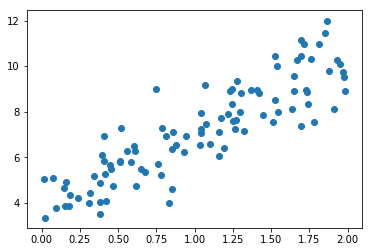

In [7]:
plt.scatter(x,y)

In [8]:
x_b = np.c_[np.ones((100,1)), x]

In [9]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [10]:
theta_best

array([[3.87542128],
       [3.21297474]])

In [11]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

In [12]:
y_pred = x_new_b.dot(theta_best)
y_pred

array([[ 3.87542128],
       [10.30137076]])

[0, 2, 0, 15]

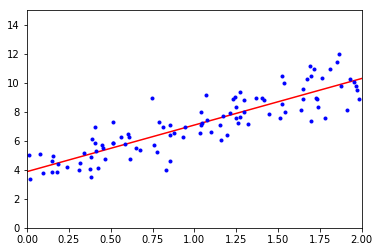

In [14]:
plt.plot(x_new, y_pred, "r-")
plt.plot(x,y, "b.")
plt.axis([0,2,0,15])


In [15]:
### Linear Regression with sklean

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lin_reg.intercept_, lin_reg.coef_

(array([3.87542128]), array([[3.21297474]]))

In [19]:
lin_reg.predict(x_new)

array([[ 3.87542128],
       [10.30137076]])

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond = 1e-6)
theta_best_svd

array([[3.87542128],
       [3.21297474]])

### Gradient Descent

In [24]:
eta = 0.1
n_iterations = 1000
m = 100

In [25]:
theta = np.random.randn(2,1)

In [26]:
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [27]:
theta

array([[3.87542128],
       [3.21297474]])

## Stochastic Gradient Descent

In [28]:
n_epochs = 50
t0, t1 = 5,50

In [29]:
def learining_schedule(t):
    return t0/(t + t1)

In [30]:
theta = np.random.randn(2,1)

In [31]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi  = x_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learining_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [32]:
theta

array([[3.95753259],
       [3.17339034]])

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sdg_ref = SGDRegressor(n_iter=50, penalty=None, eta0 = 0.1)

In [37]:
sdg_ref.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [38]:
sdg_ref.intercept_, sdg_ref.coef_

(array([3.88615016]), array([3.2277325]))

### Polynomial Regression 

In [39]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

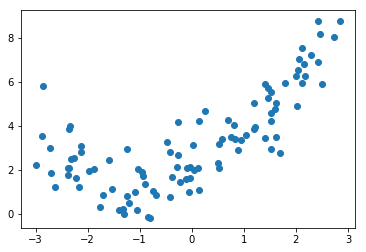

In [40]:
plt.scatter(x,y)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_f.fit_transform(x)

In [42]:
x[0]

array([1.60282193])

In [43]:
x_poly[0]

array([1.60282193, 2.56903813])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lin_reg.intercept_, lin_reg.coef_

(array([2.05119329]), array([[1.04221465, 0.47878016]]))

### Learning Curve

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [102]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

In [112]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

 

In [113]:
lin_reg = LinearRegression()

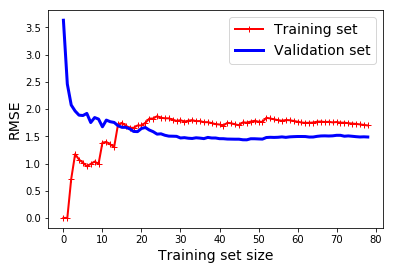

In [114]:
plot_learning_curves(lin_reg, x,y)

In [115]:
from sklearn.pipeline import Pipeline

[0, 80, 0, 3]

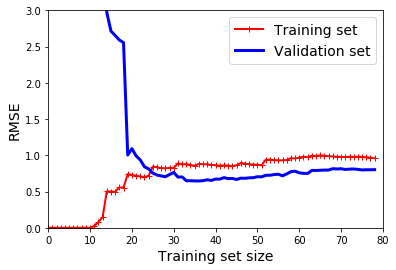

In [120]:
poly_reg = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))
plot_learning_curves(poly_reg, x,y)
plt.axis([0,80,0,3])

## Regularized models

In [135]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.randn(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [136]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline((
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ))
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

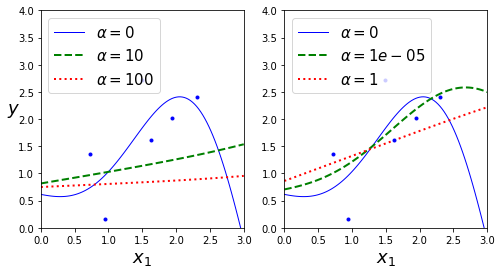

In [137]:
plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=True, alphas =(0,10,100))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))

In [139]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.49580043]])

In [140]:
### Sochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([0.87043119])

In [141]:
ridge_reg = Ridge(alpha=1, solver="sag")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.49482787]])

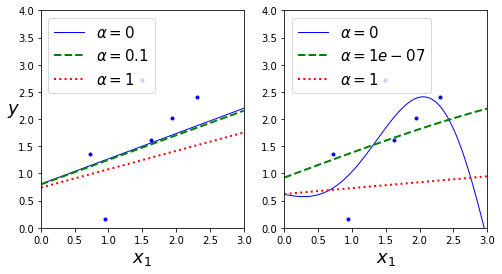

In [142]:
### Lasso Regression 
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1)

In [143]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.47614517])

In [144]:
#### Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.48310271])

Text(0,0.5,'RMSE')

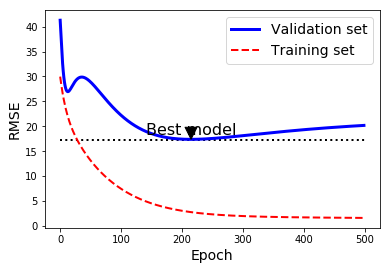

In [146]:
##### Early Stopping
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)


In [149]:
#### Early Stop 
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005,
                       random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch, best_model

(215, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))